In [8]:
import pandas as pd

# Load the dataset
file_path = "Global_PCOS_Demographics_Cleaned.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()
df_desc = df.describe()

df_info, df_head, df_desc


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Country                      120000 non-null  object 
 1   Age                          120000 non-null  int64  
 2   BMI                          120000 non-null  object 
 3   Menstrual_Regularity         120000 non-null  object 
 4   Hirsutism                    120000 non-null  object 
 5   Acne_Severity                59915 non-null   object 
 6   Family_History_of_PCOS       120000 non-null  object 
 7   Insulin_Resistance           120000 non-null  object 
 8   Lifestyle_Score              120000 non-null  int64  
 9   Stress_Levels                120000 non-null  object 
 10  Urban_Rural                  120000 non-null  object 
 11  Socioeconomic_Status         120000 non-null  object 
 12  Awareness_of_PCOS            120000 non-null  object 
 13 

(None,
       Country  Age          BMI Menstrual_Regularity Hirsutism Acne_Severity  \
 0  Madagascar   26   overweight              regular       yes        severe   
 1     Vietnam   16  underweight              regular       yes           NaN   
 2     Somalia   41       normal              regular        no      moderate   
 3      Malawi   27       normal            irregular        no          mild   
 4      France   26   overweight            irregular       yes           NaN   
 
   Family_History_of_PCOS Insulin_Resistance  Lifestyle_Score Stress_Levels  \
 0                    yes                yes                2           low   
 1                     no                yes                4          high   
 2                     no                 no                7        medium   
 3                     no                 no               10           low   
 4                     no                 no                7        medium   
 
   Urban_Rural Socioeconomic_

In [9]:
from sklearn.decomposition import PCA

# Applying PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1', 'PC2', 'PC3'])

# Percentage of variance explained by each component
variance_explained = pca.explained_variance_ratio_ * 100

print(df_pca.head())
# Show variance explained
variance_explained


        PC1       PC2       PC3
0  1.521551  1.106130 -0.418156
1  0.181403  0.310557  1.095483
2 -0.177954 -0.971720 -0.125764
3 -1.251081 -1.708201  0.041948
4 -0.607066  1.522515 -1.552659


array([33.74619438, 33.32510472, 32.9287009 ])

In [10]:
from sklearn.preprocessing import StandardScaler

# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Extracting numerical data
df_numeric = df[numerical_cols]

# Sampling 10,000 data points for clustering analysis
df_sampled = df_numeric.sample(n=10000, random_state=42)


# Normalizing the sampled data
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_sampled), columns=numerical_cols)

# Applying PCA to reduce to 3 dimensions for visualization
pca = PCA(n_components=3)
df_pca = pd.DataFrame(pca.fit_transform(df_normalized), columns=['PC1', 'PC2', 'PC3'])

print(df_normalized.head())

        Age  Lifestyle_Score  Undiagnosed_PCOS_Likelihood
0  1.476927         0.851701                     1.603903
1  0.299084         0.503200                    -0.047953
2 -1.075066         1.200202                    -0.306773
3 -0.093531        -0.193801                    -0.401745
4 -0.093531        -1.587804                    -0.807997


[0.24595693783130382]
[0.24595693783130382, 0.24214256591503464]
[0.24595693783130382, 0.24214256591503464, 0.26792919162629153]
[0.24595693783130382, 0.24214256591503464, 0.26792919162629153, 0.2709614952999434]
[0.24595693783130382, 0.24214256591503464, 0.26792919162629153, 0.2709614952999434, 0.2904420938623823]
[0.24595693783130382, 0.24214256591503464, 0.26792919162629153, 0.2709614952999434, 0.2904420938623823, 0.28510583674521833]
[0.24595693783130382, 0.24214256591503464, 0.26792919162629153, 0.2709614952999434, 0.2904420938623823, 0.28510583674521833, 0.28847552165811613]
[0.24595693783130382, 0.24214256591503464, 0.26792919162629153, 0.2709614952999434, 0.2904420938623823, 0.28510583674521833, 0.28847552165811613, 0.28910487975859894]


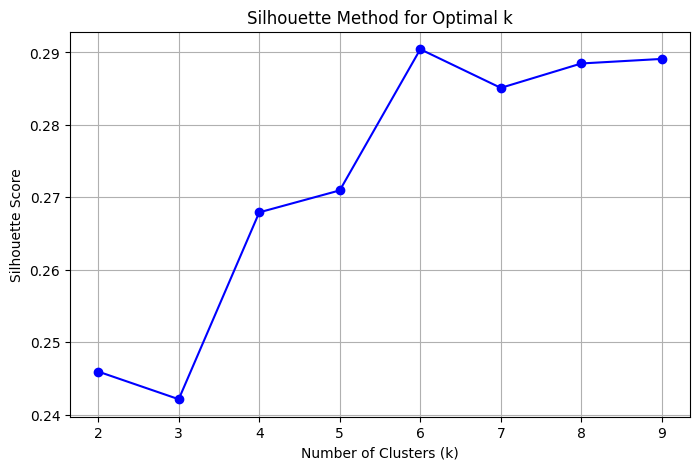

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Finding the optimal k using the Silhouette Method
silhouette_scores = []
K_range = range(2,10)  # Testing k from 2 to 9


for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(silhouette_scores)



# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method for Optimal k")
plt.grid(True)
plt.show()


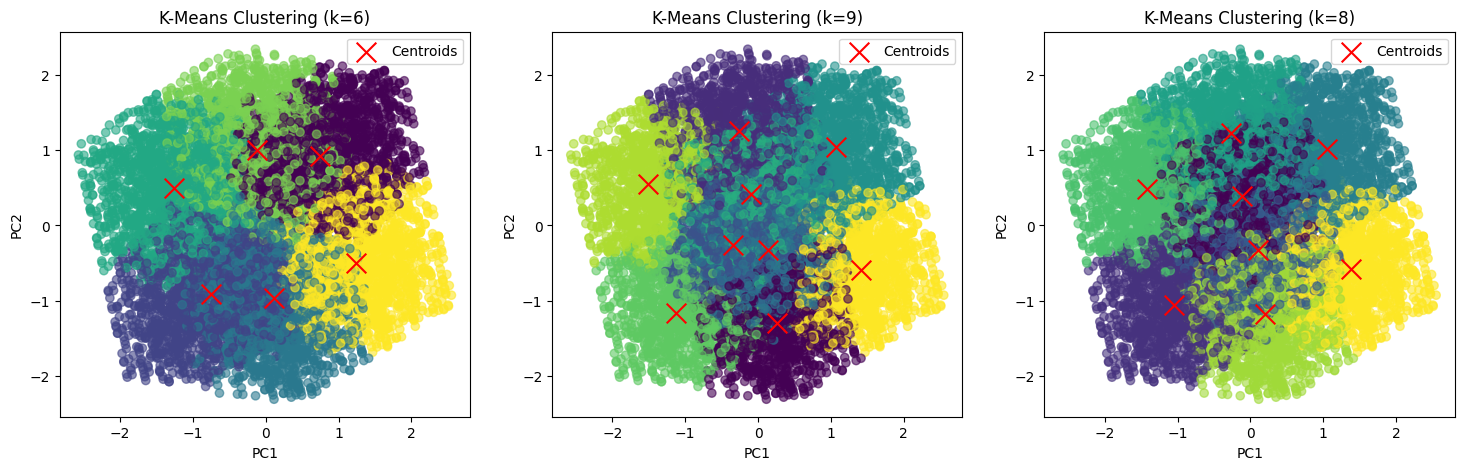

In [12]:
# Selecting three smart values of k based on silhouette scores
optimal_ks = sorted(zip(K_range, silhouette_scores), key=lambda x: x[1], reverse=True)[:3]
optimal_ks = [k for k, _ in optimal_ks]

# Applying K-Means clustering with the selected k values
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, k in enumerate(optimal_ks):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_pca)

    # Scatter plot of clusters
    axes[i].scatter(df_pca["PC1"], df_pca["PC2"], c=clusters, cmap='viridis', alpha=0.6)
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                    marker='x', s=200, c='red', label='Centroids')
    axes[i].set_title(f'K-Means Clustering (k={k})')
    axes[i].set_xlabel("PC1")
    axes[i].set_ylabel("PC2")
    axes[i].legend()

plt.show()


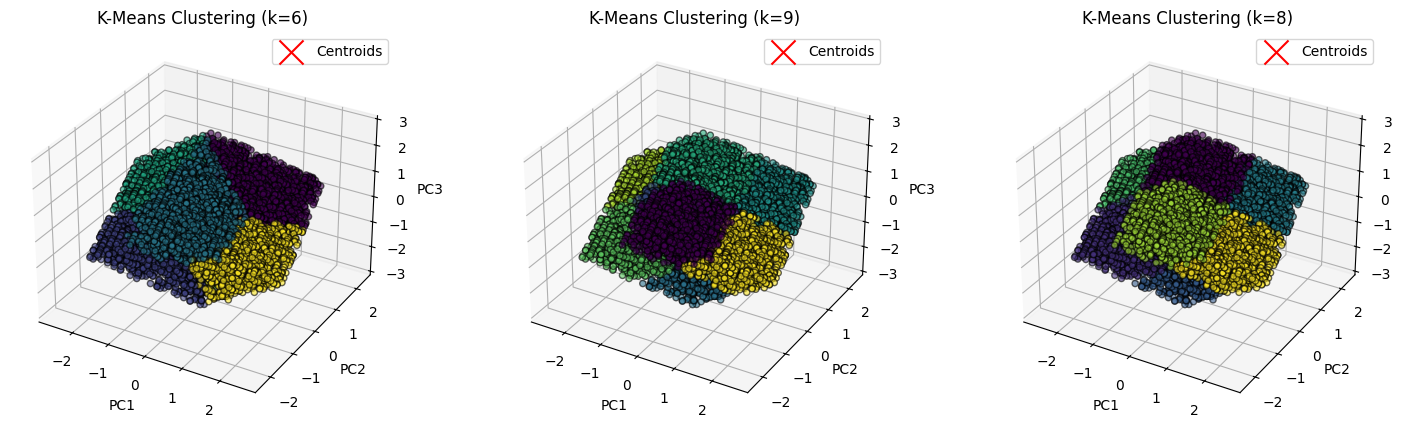

In [13]:
# Generating 3D scatter plots for each optimal k
fig = plt.figure(figsize=(18, 5))

for i, k in enumerate(optimal_ks):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(df_pca)

    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.scatter(df_pca["PC1"], df_pca["PC2"], df_pca["PC3"], c=clusters, cmap='viridis', alpha=0.6, edgecolors='k')
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
               marker='x', s=300, c='red', label='Centroids')

    ax.set_title(f'K-Means Clustering (k={k})')
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.legend()

plt.show()


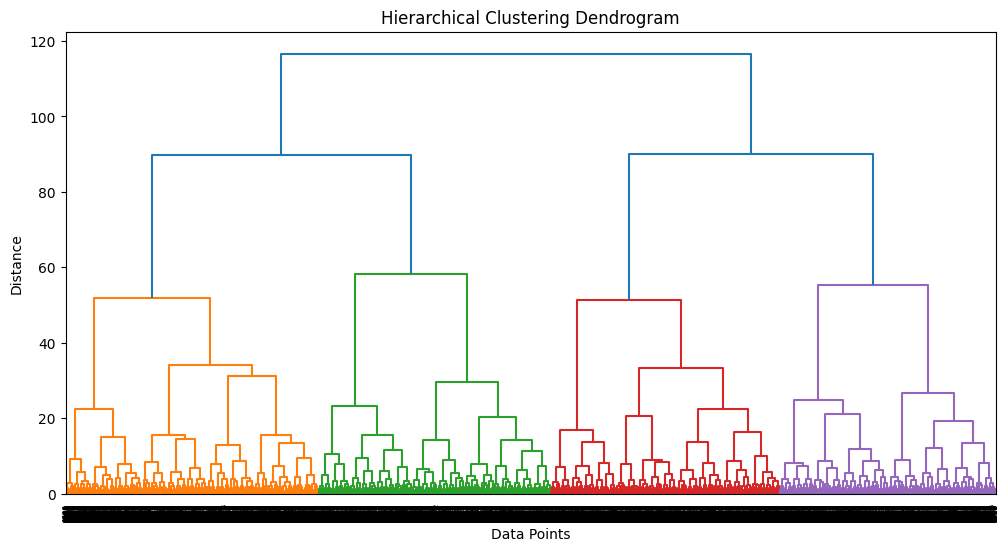

In [14]:
# Re-import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Generate the dendrogram
plt.figure(figsize=(12, 6))
linkage_matrix = sch.linkage(df_pca, method='ward')
sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()




<ipython-input-16-bdb64b2d04a3>:8: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(cosine_dist_matrix, method='ward')


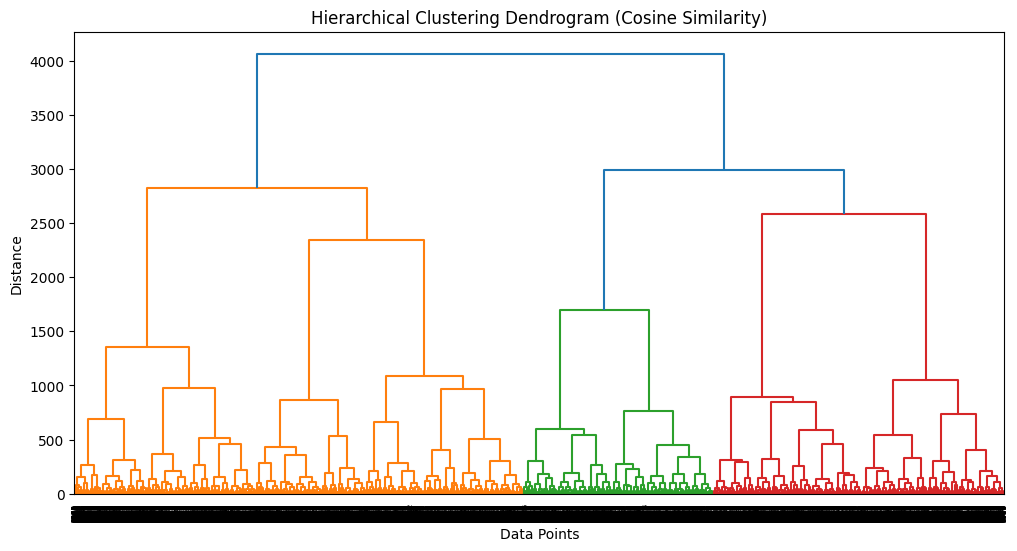

In [16]:
from sklearn.metrics.pairwise import cosine_distances

# Compute the Cosine Distance Matrix
cosine_dist_matrix = cosine_distances(df_pca)

# Generate the dendrogram using Cosine Distance
plt.figure(figsize=(12, 6))
linkage_matrix = sch.linkage(cosine_dist_matrix, method='ward')
sch.dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Cosine Similarity)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()




In [ ]:
# Apply Agglomerative Clustering using the precomputed cosine distance
n_clusters = 3  # Based on dendrogram analysis
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='precomputed', linkage='average')
agg_clusters = agg_clustering.fit_predict(cosine_dist_matrix)

# 2D Scatter plot of Agglomerative Clustering (PC1 vs PC2)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=agg_clusters, cmap='viridis', alpha=0.6, edgecolors='k')
plt.title("2D Hierarchical Clustering (PC1 vs PC2) - Cosine Similarity")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# 3D Scatter plot of Agglomerative Clustering results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca["PC1"], df_pca["PC2"], df_pca["PC3"], c=agg_clusters, cmap='viridis', alpha=0.6, edgecolors='k')

ax.set_title("3D Hierarchical Clustering (Agglomerative) - Cosine Similarity")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

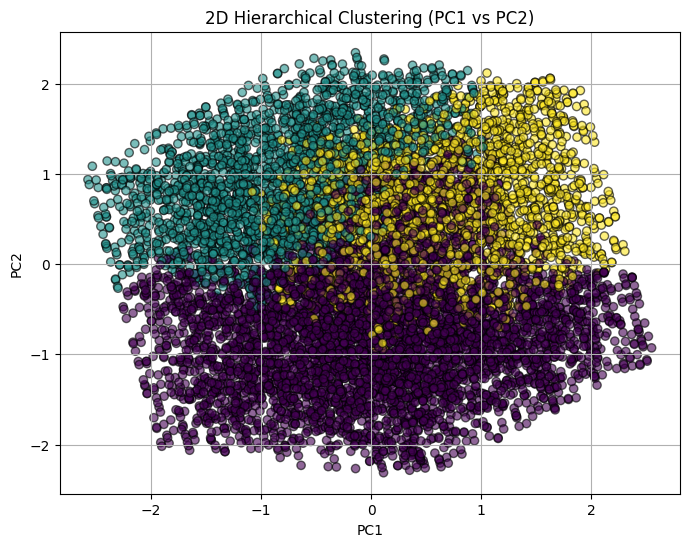

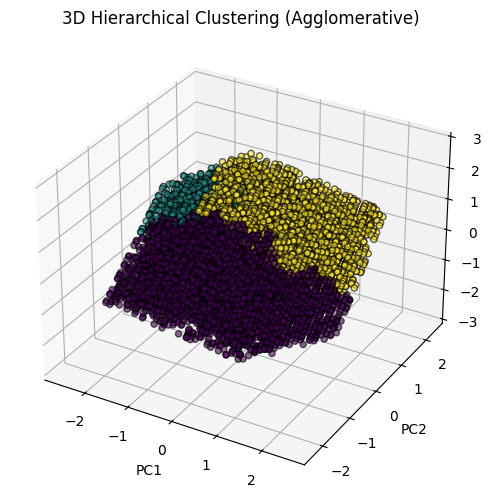

In [39]:

# Apply Agglomerative Clustering
n_clusters = 3  # Based on dendrogram analysis
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
agg_clusters = agg_clustering.fit_predict(df_pca)

# 2D Scatter plot of Agglomerative Clustering (PC1 vs PC2)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=agg_clusters, cmap='viridis', alpha=0.6, edgecolors='k')
plt.title("2D Hierarchical Clustering (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# 3D Scatter plot of Agglomerative Clustering results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca["PC1"], df_pca["PC2"], df_pca["PC3"], c=agg_clusters, cmap='viridis', alpha=0.6, edgecolors='k')

ax.set_title("3D Hierarchical Clustering (Agglomerative)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


Best DBSCAN Parameters: eps=0.2, min_samples=15
Number of clusters found: 177


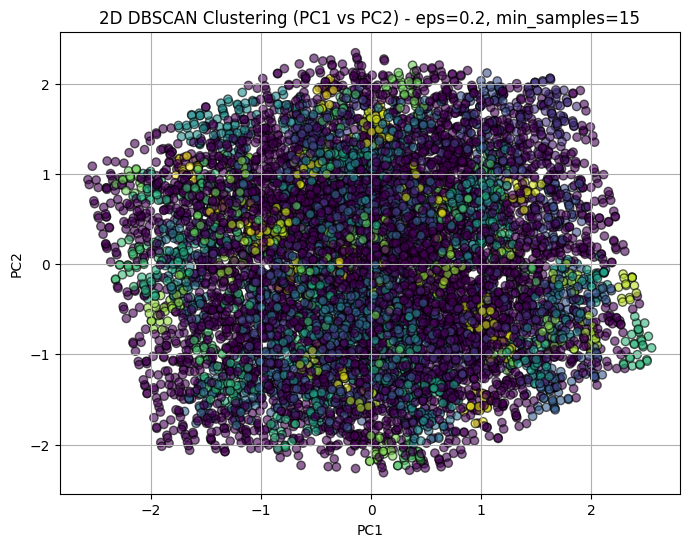

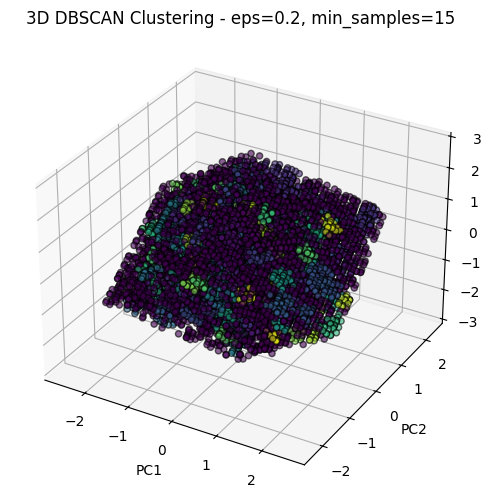

In [41]:


# Fine-tuning DBSCAN parameters
eps_values = [0.2, 0.3, 0.5, 0.7]  # Different neighborhood sizes
min_samples_values = [5, 10, 15]  # Different minimum points per cluster

# Store results
dbscan_results = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_pca)
        num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        dbscan_results[(eps, min_samples)] = num_clusters

# Find the best combination with the highest number of clusters
best_params = max(dbscan_results, key=dbscan_results.get)
best_eps, best_min_samples = best_params

# Apply DBSCAN with the best parameters
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_clusters = dbscan_best.fit_predict(df_pca)

# Number of clusters found with the best parameters
num_clusters_best = dbscan_results[best_params]

print(f"Best DBSCAN Parameters: eps={best_eps}, min_samples={best_min_samples}")
print(f"Number of clusters found: {num_clusters_best}")

# 2D Scatter plot of DBSCAN Clustering (PC1 vs PC2)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca["PC1"], df_pca["PC2"], c=dbscan_clusters, cmap='viridis', alpha=0.6, edgecolors='k')
plt.title(f"2D DBSCAN Clustering (PC1 vs PC2) - eps={best_eps}, min_samples={best_min_samples}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# 3D Scatter plot of DBSCAN Clustering results
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca["PC1"], df_pca["PC2"], df_pca["PC3"], c=dbscan_clusters, cmap='viridis', alpha=0.6, edgecolors='k')

ax.set_title(f"3D DBSCAN Clustering - eps={best_eps}, min_samples={best_min_samples}")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


In [42]:
from sklearn.metrics import silhouette_score

# Compute Silhouette Scores for K-Means, Hierarchical Clustering, and DBSCAN

# Apply K-Means with the best k (from previous results)
best_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_clusters = best_kmeans.fit_predict(df_pca)
kmeans_silhouette = silhouette_score(df_pca, kmeans_clusters)

# Apply Agglomerative Clustering with the best cluster count
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_clusters = agg_clustering.fit_predict(df_pca)
agg_silhouette = silhouette_score(df_pca, agg_clusters)

# Compute Silhouette Score for DBSCAN (ignoring noise points)
dbscan_valid_clusters = dbscan_clusters[dbscan_clusters != -1]  # Removing noise points
dbscan_valid_data = df_pca.iloc[dbscan_clusters != -1]  # Keeping only valid points

if len(set(dbscan_valid_clusters)) > 1:  # Ensure there are at least two clusters for silhouette score
    dbscan_silhouette = silhouette_score(dbscan_valid_data, dbscan_valid_clusters)
else:
    dbscan_silhouette = -1  # Invalid score if DBSCAN creates only one cluster

# Display results
silhouette_scores = {
    "K-Means": kmeans_silhouette,
    "Hierarchical Clustering": agg_silhouette,
    "DBSCAN": dbscan_silhouette
}

silhouette_scores


{'K-Means': 0.24214256591503464,
 'Hierarchical Clustering': 0.2047159454950941,
 'DBSCAN': 0.3389303063029981}

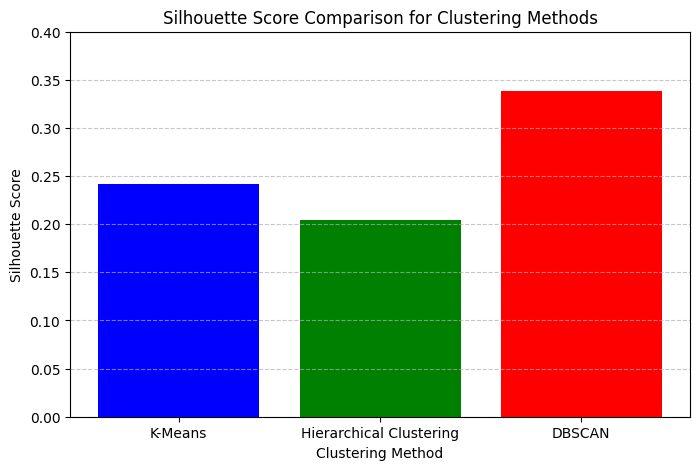

In [43]:
# Plot Silhouette Scores for comparison
plt.figure(figsize=(8, 5))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel("Clustering Method")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Comparison for Clustering Methods")
plt.ylim(0, 0.4)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
